#### Naming Conventions
     1. Class Names    : Pascal Case.
     2. Function Names : Camel Case.
     3. Variable Names : Snake Case.
     4. Constant Names : Upper Case.
     5. Object Names   : Snake-Camel Case.

### Algorithm:
    A* Search algorithm is a search algorithm to find the shortest algorithm between two nodes in a graph by using a 
    heurestic function in order to direct the search towards the goal.
    
    Here, we have used Manhattan Distance as the heurestic function.

### Import Libraries

In [1]:
import matplotlib.pyplot as plt  # Plotting Library.
import numpy as np               # Numpy Library.
from collections import deque    # Special List.
from celluloid import Camera     # Camera to record.

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%matplotlib notebook

### A* Search Algorithm for finding shortest path.

In [64]:
class AStar:
    '''A* Search Algorithm for Shortest Path.'''
    def __init__(self, map_of_world, start, goal, heurestic='MAN'):
        '''Instantiates A* Search Class.
           Pass:
           =======
                  map_of_world: Map of the Environment with Obstacles; Type ==> 2-D Vector; Size==> (m X n).
                  start       : Start Location; Type ==> Tuple; Size ==> Length of 2.
                  goal        : Goal  Location; Type ==> Tuple; Size ==> Length of 2.
                  heurestic   : Heurestic Function - MAN/EUC; Type ==> String.
        ===============================================================================================================
        '''
        ### Instantiate:
        self.map_of_world = map_of_world       # Instantiate Variable.
        self.start        = start              # Instantiate Variable.
        self.goal         = goal               # Instantiate Variable.
        self.heurestic    = heurestic          # Instantiate Variable.
        
        ### Operations:
        self.m, self.n = map_of_world.shape    # Number of Rows and Columns.
        self.map_of_world[self.start] = 3      # Start Value.
        self.map_of_world[self.goal]  = 18     # Goal Value.
        
        ### Display Map:
        figure = plt.figure(figsize=(8,8))     # Display Figure.
        self.createPlot(self.map_of_world)     # Display Map.
        
        
        
    @staticmethod
    def createMap(m_size, n_size):
        '''Creates the map of the world without Obstacles.
           Pass:
           =======
                  m_size: X-Direction Size; Type ==> Scalar; Data Type ==> (Int).
                  n_size: Y-Direction Size; Type ==> Scalar; Data Type ==> (Int).
           ============================================================================================================     
           Return:
           =======
                  map_of_world: Map of the Environment without Obstacles; Type ==> 2-D Vector; Size==> (m X n). 
           ============================================================================================================
        '''
        map_of_world = np.zeros(shape=(m_size, n_size), dtype=np.int64) # Create Zeros Numpy Array of size (m X n).
        
        return map_of_world  # Return Array.
    
    @staticmethod
    def createObstacle(map_of_world, index_row_1, index_row_2, index_col_1, index_col_2):
        '''Creates Obstacles in a Map given the Map.
           Pass:
           =======
                  map_of_world: Map of the Environment with/without Obstacles; Type ==> 2-D Vector; Size==> (m X n).
                  index_row_1 : Index of the first  Row    (inclusive); Type ==> Scalar; Data Type ==> (Int).
                  index_row_2 : Index of the second Row    (exclusive); Type ==> Scalar; Data Type ==> (Int).
                  index_col_1 : Index of the first  Column (inclusive); Type ==> Scalar; Data Type ==> (Int).
                  index_col_2 : Index of the second Column (exclusive); Type ==> Scalar; Data Type ==> (Int).
           ============================================================================================================
           Return:
           =======
                  map_of_world: Map of the Environment with Obstacles; Type ==> 2-D Vector; Size==> (m X n).
           ============================================================================================================
        '''
        map_of_world[index_row_1:index_row_2, index_col_1:index_col_2] = 21 # Create Obstacle.
        
        return map_of_world # Return Array.
    
    def createPlot(self, map_of_world):
        '''Helper Function to Plot and Record the Plot.
           Pass:
           =======
                  map_of_world: Map of the Environment;  Type ==> 2-D Vector; Size==> (m X n).
           ============================================================================================================
           Return:
           =======
                  None
           ============================================================================================================
        '''
        ax = plt.gca()                                                 # Get Current Axes.
        ax.imshow(map_of_world, cmap=plt.cm.jet)                       # Show Image.
        ax.set_xticks(np.arange(0, self.m, 1))                         # X-Ticks.
        ax.set_yticks(np.arange(0, self.n, 1))                         # Y-Ticks.
        ax.set_xticks(np.arange(-.5, self.m, 1), minor=True)           # Minor X-Ticks.
        ax.set_yticks(np.arange(-.5, self.n, 1), minor=True)           # Minor Y-Ticks.
        ax.grid(which='minor', color='w', linestyle='-', linewidth=2)  # Plot grids.
        
    def manhattan(self, current, goal):
        '''Calculates the Manhattan Distance between two nodes.
           Pass:
           =======
                  current: current node; Type ==> Tuple; Size ==> (m, n).
                  goal   : goal node;    Type ==> Tuple; Size ==> (m, n).
           ============================================================================================================
           Return:
           =======
                  manhattan_dist: the manhattan distance; Type ==> Scalar; Data Type ==> (float).
           ============================================================================================================
        '''
        manhattan_dist = np.abs(current[0] - goal[0]) + np.abs(current[1] - goal[1]) # Manhattan Distance.
        
        return manhattan_dist # Return Distance.
    
    def euclidean(self, current, goal):
        '''Calculates the Euclidean Distance between two nodes.
           Pass:
           =======
                  current: current node; Type ==> Tuple; Size ==> (m, n).
                  goal   : goal node;    Type ==> Tuple; Size ==> (m, n).
           ============================================================================================================
           Return:
           =======
                  euclidean_dist: the euclidean distance; Type ==> Scalar; Data Type ==> (float).
           ============================================================================================================
        '''
        euclidean_dist = np.sqrt((current[0] - goal[0])**2 + (current[1] - goal[1])**2) # Euclidean Distance.
        
        return euclidean_dist # Return Distance.
    
    def searchMinDistGetNodes(self, list_nodes, list_dist):
        '''Helper Function to get the nodes which have minimum distance when explored.
           Pass:
           =======
                  list_nodes: the list of explored nodes; Type ==> List.
                  list_dist : the list with distance to goal w.r.t nodes; Type ==> List.
           ============================================================================================================
           Return:
           =======
                  list_min_dist_nodes: the list of nodes with minimum distance; Type ==> List.
        '''
        min_val = min(list_dist)         # Get Minimum Distance Value.
        list_index = []                  # Create Empty list to store the index of minimum distances.
        
        ### Get Index of minimum distances in the list:
        for i in range(len(list_dist)):  # Loop through the List with distances.
            if min_val == list_dist[i]:  # If Minimum Values are there multiple times then we get index of all the values.
                list_index.append(i)     # Append to the Index list.
        
        ### Get the nodes which have minimum distance:
        list_min_dist_nodes = []         # Create Empty list to store nodes which have minimum distances.
        for i in list_index:             # Loop through the Index List.
            list_min_dist_nodes.append(list_nodes[i]) # Append nodes which have minimum distances.

        return list_min_dist_nodes  # Return List.
    
    def aStarSearch(self, gif_name):
        '''Implements A Star Search Algorithm for Shortest Path.
           Pass:
           =======
                  gif_name: name of gif; Type ==> string.
           ============================================================================================================
           Return:
                  route: Route containing tuple of nodes of the Shortest Path; Type ==> List.
           ============================================================================================================
        '''
        ### Decide the Heurestic function:
        if self.heurestic == 'MAN':
            heurestic = self.manhattan     # Assign Manhattan Function.
        elif self.heurestic == 'EUC':
            heurestic = self.euclidean     # Assign Euclidean Function.
            
        ### Create Boundary Map:
        boundary_map = np.zeros(shape=(self.m+2, self.n+2)) # Boundary Reference Map.
        boundary_map[0, :]        = 1   # Make Top Boundary as 1.
        boundary_map[self.m+1, :] = 1   # Make Bottom Boundary as 1.
        boundary_map[:, 0]        = 1   # Make Left Boundary as 1.
        boundary_map[:, self.n+1] = 1   # Make Right Boundaary as 1.
#         print(boundary_map)
#         print(self.map_of_world)
        ### Create Distance Map:
        ##### First Distance Map will be for heurestic + g value and Second will be for g-value.
        distance_map = np.ones(shape=(2, self.m, self.n)) * np.inf    # Distance array as 3-D Array.
        distance_map[0, self.start[0], self.start[1]] = 0             # Initialise the start nodes with value 0.
        distance_map[1, self.start[0], self.start[1]] = 0             # Initialise the start nodes with value 0.
#         print(distance_map)
        ### Create List to record explored nodes:
        list_node = [self.start]             # This list will record explored nodes. Used to get the shortest route.
        list_node_dummy = [[self.start]]     # This list will explore map by saving the explored nodes in a nested format.
        
        ### Create Variables for the loop:
        loop = True     #  To determine to explore or not. Set to 'True' for exploring and 'False' when goal is reached.
        b = 0           # Variable to access the nested list members{FIRST INDEX}.
        distance = 0    # Assign explored nodes a distance. It will increase by 1 in each loop.
        route_present = True # Assume there is a route.
        
        ### Create Figure and Camera:
        figure = plt.figure(figsize=(6,6)) # Figure.
        camera = Camera(figure)              # Camera.
        ax = plt.gca()                       # Get Current Axes.
        plt.ion()                            # Interactive Mode.
        ax.imshow(self.map_of_world)         # Show Image
        camera.snap()                        # Snap Camera
        figure.show()                        # Show Figure.
        figure.canvas.draw()                 # Draw Canvas.
        
         ### Explore:
        ##############################################################################################################
        while loop == True:
            li = [] # Empty list to record nodes in each exploration. Set to be empty in every loop.
            li_dist = [] # To Record Distances.
            
            ##### Explore the Unexplored nodes which are marked by the algorithm.
            for a in range(len(list_node_dummy[b])): # Explore through Unexplored Nodes which are marked, a:{SECOND INDEX}
                i, j = list_node_dummy[b][a][0], list_node_dummy[b][a][1] # Get Indices of the nodes.
                
                ##### Downwards Exploration:
                if boundary_map[i+2, j+1] != 1: # Check if we reach a boundary node when we explore given map.
                    if ((self.map_of_world[i+1, j] == 0) or (self.map_of_world[i+1, j] == 18)) and ((i+1, j) not in list_node):  
                            
                            distance_map[0, i+1, j] = distance + 1  + heurestic((i+1, j), self.goal) # Calculate h(x) + g(x).
                            distance_map[1, i+1, j] = distance + 1                        # Calculate the g-value.
                            print(distance + 1  + heurestic((i+1, j), self.goal))
                            li.append((i+1, j))                                  # Append the Node.
                            li_dist.append(distance + 1  + heurestic((i+1, j), self.goal))  # Append the Node.
                            list_node.append((i+1, j))                           # Append the Node.
                            
                            if self.map_of_world[i+1, j] == 18: # If we reach goal.
                                loop = False                    # Set Loop to false.
                                break                           # Break the For Loop.
                                
                            self.map_of_world[i+1, j] = 7       # Change the value of the node in the map.
                            self.createPlot(self.map_of_world)  # Plot and Record.
                            camera.snap()                       # Snap Camera
                            figure.canvas.draw()                # Draw Canvas.
                            
                ##### Rightwards Exploration:
                if boundary_map[i+1, j+2] != 1: # Check if we reach a boundary node when we explore given map.
                    if ((self.map_of_world[i, j+1] == 0) or (self.map_of_world[i, j+1] == 18)) and ((i, j+1) not in list_node):         
                            
                            distance_map[0, i, j+1] = distance + 1  + heurestic((i, j+1), self.goal) # Calculate h(x) + g(x).
                            distance_map[1, i, j+1] = distance + 1                        # Calculate the g-value. 
                            
                            li.append((i, j+1))                                  # Append the Node.
                            li_dist.append(distance + 1  + heurestic((i, j+1), self.goal))  # Append the Node.
                            list_node.append((i, j+1))                           # Append the Node.
                            
                            if self.map_of_world[i, j+1] == 18: # If we reach goal.
                                loop = False                    # Set Loop to false.
                                break                           # Break the For Loop.
                            
                            self.map_of_world[i, j+1] = 7       # Change the value of the node in the map.
                            self.createPlot(self.map_of_world)  # Plot and Record.
                            camera.snap()                       # Snap Camera
                            figure.canvas.draw()                # Draw Canvas.

                ##### Upwards Exploration:
                if boundary_map[i, j+1] != 1: # Check if we reach a boundary node when we explore given map.
                    if ((self.map_of_world[i-1, j] == 0) or (self.map_of_world[i-1, j] == 18)) and ((i-1, j) not in list_node):  
                            
                            distance_map[0, i-1, j] = distance + 1  + heurestic((i-1, j), self.goal) # Calculate h(x) + g(x).
                            distance_map[1, i-1, j] = distance + 1                        # Calculate the g-value. 
                            
                            li.append((i-1, j))                                  # Append the Node.
                            li_dist.append(distance + 1  + heurestic((i-1, j), self.goal))  # Append the Node.
                            list_node.append((i-1, j))                           # Append the Node.
                            
                            
                            if self.map_of_world[i-1, j] == 18: # If we reach goal.
                                loop = False                    # Set Loop to false.
                                break                           # Break the For Loop.
                                
                            self.map_of_world[i-1, j] = 7       # Change the value of the node in the map.
                            self.createPlot(self.map_of_world)  # Plot and Record.
                            camera.snap()                       # Snap Camera
                            figure.canvas.draw()                # Draw Canvas.
                       
                ##### Leftwards Exploration:
                if boundary_map[i+1, j] != 1: # Check if we reach a boundary node when we explore given map.
                    if ((self.map_of_world[i, j-1] == 0) or (self.map_of_world[i, j-1] == 18)) and ((i, j-1) not in list_node):         
                            
                            distance_map[0, i, j-1] = distance + 1  + heurestic((i, j-1), self.goal) # Calculate h(x) + g(x).
                            distance_map[1, i, j-1] = distance + 1                        # Calculate the g-value. 
                            
                            li.append((i, j-1))                                  # Append the Node.
                            li_dist.append(distance + 1  + heurestic((i, j-1), self.goal))  # Append the Node.
                            list_node.append((i, j-1))                           # Append the Node.
                            
                            if self.map_of_world[i, j-1] == 18: # If we reach goal.
                                loop = False                    # Set Loop to false.
                                break                           # Break the For Loop.
                                
                            self.map_of_world[i, j-1] = 7       # Change the value of the node in the map.
                            self.createPlot(self.map_of_world)  # Plot and Record.
                            camera.snap()                       # Snap Camera
                            figure.canvas.draw()                # Draw Canvas.
                            
            ### Control to find if No Route is between start and goal:
            if li == []:                       # If list is empty.
                print('No Route Present!')     # Print Message.
                route_present = False          # Make Route Present False.
                break                          # Break the loop.
                
            print(li_dist)
            print(li)
            ### Make Explored Nodes in different colors                
            for i in li:
                if i != self.goal:
                    self.map_of_world[i] = 11   # Change the value of the node in the map.
                
            ### Plot and Record:
            self.createPlot(self.map_of_world)         # Plot
            camera.snap()                              # Snap Camera
            figure.canvas.draw()                       # Draw Canvas.
            
            ### Get nodes with minimum distances
            li_nodes_min_dist = self.searchMinDistGetNodes(li, li_dist)  # Get Nodes.
            print(li_nodes_min_dist)
            list_node_dummy.append(li_nodes_min_dist)                    # Append to list.
            
            ### Update:
            distance += 1              # Update Distance value by 1.
            b += 1                     # Update FIRST INDEX value by 1.
            
            
        self.createPlot(self.map_of_world)         # Plot and Record
        camera.snap()                              # Snap Camera
        figure.canvas.draw()                       # Draw Canvas.
        
        print('Exploration Done!')  # Print Message.
        
#         return None
        
        ### Find Route:
        if route_present == True:
            ### Create Route: 
            route = deque()              # Special List.
            route.appendleft(self.goal)  # Append Goal to list.

            ##### Start to Reverse Trace the explored nodes from goal to start:
            ##############################################################################################################
            while distance_map[1, route[0][0], route[0][1]] != 0:

                for it in range(len(list_node)-1, -1, -1):        # Reverse Trace the explored nodes.
                    i, j = route[0][0], route[0][1]               # Indices of the nodes.
                    x, y = list_node[it][0], list_node[it][1]     # Get indices of the nodes.

                    try: # There might be exception when we reach a boundary node of the map_of_world.
                        if (distance_map[1, i, j] > distance_map[1, x, y]) and  ((i+1,j) == (x,y) or (i,j+1) == (x,y) or (i-1,j) == (x,y) or (i,j-1) == (x,y)): 
                            # If Distance of node in route is greater than distance in explored nodes. 
                            # If those explored nodes are in + orientation near the route node.

                            route.appendleft(list_node[it]) # Append to route.
                    except:
                        pass # Pass the exception.
            print('Route Found!')
            ##############################################################################################################

            ##### Give the route nodes a value in the map of world:
            for i in range(1, len(route)-1):
                self.map_of_world[route[i][0], route[i][1]] = 15    # Give a value of 13.
                self.createPlot(self.map_of_world)         # Plot and Record.
                camera.snap()                              # Snap Camera
                figure.canvas.draw()                       # Draw    
            
        else: 
            route = None  # If there is no route then return a None object.
            
        ### Save Animation as GIF:
        animation = camera.animate(blit=False, interval=1) # Animate.
        animation.save(f'AStar_{gif_name}.gif')         # Save.
        
        return route # Return Route


### Create Map, Start and Goal 

In [65]:
map_of_world = AStar.createMap(6, 6)   # Create map
map_of_world = AStar.createObstacle(map_of_world, 0, 1, 2, 3) # Create Obstacles.
# map_of_world = AStar.createObstacle(map_of_world, 2, 4, 2, 3) # Create Obstacles.
# map_of_world = AStar.createObstacle(map_of_world, 2, 3, 3, 5) # Create Obstacles.
map_of_world = AStar.createObstacle(map_of_world, 3, 4, 1, 6) # Create Obstacles.
# map_of_world = AStar.createObstacle(map_of_world, 4, 5, 5, 6) # Create Obstacles.

In [66]:
start = (5,3) # Start Node.
goal  = (2,5) # Goal Node.

### Create AStar Object

<IPython.core.display.Javascript object>


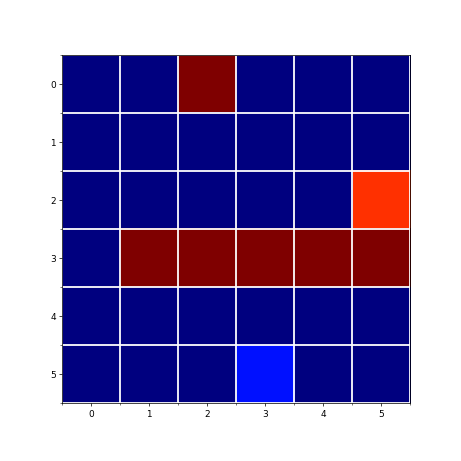

In [67]:
a_Star = AStar(map_of_world, start, goal, 'EUC') # Create AStar Object.

<IPython.core.display.Javascript object>


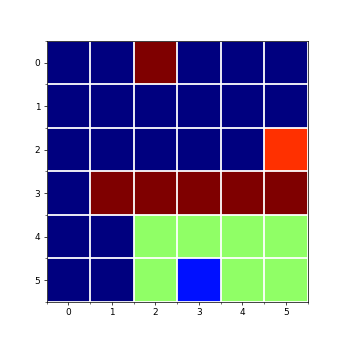

[4.16227766016838, 3.8284271247461903, 5.242640687119285]
[(5, 4), (4, 3), (5, 2)]
[(4, 3)]
[4.23606797749979, 5.60555127546399]
[(4, 4), (4, 2)]
[(4, 4)]
[5.0]
[(4, 5)]
[(4, 5)]
7.0
[7.0]
[(5, 5)]
[(5, 5)]
No Route Present!


MovieWriter ffmpeg unavailable; using Pillow instead.


Exploration Done!


In [68]:
route = a_Star.aStarSearch('6by6') # Find Shortest Path.